In [2]:
# Dependencies
import pandas as pd 
import numpy as np
import requests
# from config import omdb_api
from pprint import pprint
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
# Store filepath in a variable
file = "resource/new.csv"

In [4]:
# Read our Data file with the pandas library
# Not every CSV requires an encoding, but be aware this can come up
df = pd.read_csv(file)
df

,Unnamed: 0,Title,imdbRating,Book Rating,Genre
0,0,Harry Potter and the Sorcerer's Stone,7.600,8.880,"Adventure, Family, Fantasy"
1,1,The Karamazov Brothers,7.800,8.620,Drama
2,2,2001: A Space Odyssey,8.300,7.460,"Adventure, Sci-Fi"
3,3,In Cold Blood,8.000,8.100,"Biography, Crime, Drama"
4,4,Treasure Island,7.000,7.640,"Adventure, Family"
5,5,Treasure Island,7.000,7.640,"Adventure, Family"
6,6,Treasure Island,7.000,7.640,"Adventure, Family"
7,7,Treasure Island,7.000,7.640,"Adventure, Family"
8,8,Treasure Island,7.000,7.640,"Adventure, Family"
9,9,The Catcher in the Rye,2.100,7.580,NaN


In [5]:
df = df[['Title', 'Book Rating', 'imdbRating', 'Genre']]
df['imdbRating'] = df['imdbRating'].fillna(0)
df.count()

C:\Users\Family\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Title          1196
Book Rating    1196
imdbRating     1196
Genre          1175
dtype: int64

In [6]:
dict = {}
for index, row in df.iterrows():
    try:
#     if row['Genre'] != 'nan':
        
        x = row['Genre'].split(', ')
        for i in x:
            if i in dict:
                dict[i] += 1
            else:
                dict[i] = 1
#     else:
#         print('false')
#     print(row['Genre'])
    except AttributeError:
        continue
print(dict)

{'Adventure': 223, 'Family': 119, 'Fantasy': 108, 'Drama': 867, 'Sci-Fi': 95, 'Biography': 55, 'Crime': 87, 'Romance': 318, 'Short': 66, 'Horror': 100, 'Action': 74, 'Animation': 65, 'Comedy': 147, 'History': 71, 'Mystery': 109, 'Thriller': 100, 'Documentary': 30, 'Adult': 3, 'Music': 17, 'War': 35, 'Musical': 4, 'Talk-Show': 2, 'Film-Noir': 3, 'Western': 1}


In [7]:
sorted(dict.values())

[1,
 2,
 3,
 3,
 4,
 17,
 30,
 35,
 55,
 65,
 66,
 71,
 74,
 87,
 95,
 100,
 100,
 108,
 109,
 119,
 147,
 223,
 318,
 867]

In [8]:
sorted(dict, key=dict.__getitem__)

['Western',
 'Talk-Show',
 'Adult',
 'Film-Noir',
 'Musical',
 'Music',
 'Documentary',
 'War',
 'Biography',
 'Animation',
 'Short',
 'History',
 'Action',
 'Crime',
 'Sci-Fi',
 'Horror',
 'Thriller',
 'Fantasy',
 'Mystery',
 'Family',
 'Comedy',
 'Adventure',
 'Romance',
 'Drama']

In [9]:
genre = ['Horror',
 'Thriller',
 'Fantasy',
 'Mystery',
 'Family',
 'Comedy',
 'Adventure',
 'Romance',
 'Drama']


avg_book = []
avg_imdb = []
for g in genre:

    rating = 0
    rating_imdb = 0
    genre_rating = []
    genre_rating_imdb = []
    for index, row in df.iterrows():
        try:
            if row['Genre'].find(g) != -1:
#                 print(df.iloc[[index]])
#                 print(row['Book Rating'])
#                 rating = rating+float(row['Book Rating'])
#                 print(rating)
                rating = row['Book Rating']
                genre_rating.append(rating)
                rating_imdb = row['imdbRating']
                genre_rating_imdb.append(rating_imdb)
            
        except AttributeError:
            continue
#     genre_rating.append(rating)
#     print(genre_rating)
    avg = sum(genre_rating)/dict[g]
    avg_book.append(avg)
    avg = sum(genre_rating_imdb)/dict[g]
    avg_imdb.append(avg)

In [10]:
avg_book

[7.950000000000002,
 7.929800000000005,
 8.001666666666669,
 8.010642201834868,
 8.079663865546223,
 7.823401360544217,
 7.881524663677133,
 7.925471698113203,
 7.93801614763552]

In [11]:
avg_imdb

[6.284999999999997,
 6.462000000000001,
 6.860185185185189,
 6.5348623853211025,
 6.812605042016803,
 6.564625850340134,
 6.663228699551566,
 7.038364779874209,
 6.907958477508646]

In [12]:
avg_rating_df = pd.DataFrame({'Genre': genre, 'Average book rating': avg_book, 'Average IMDB rating': avg_imdb})
avg_rating_df = avg_rating_df.set_index('Genre')
avg_rating_df

,Average book rating,Average IMDB rating
Genre,,
Horror,7.950,6.285
Thriller,7.930,6.462
Fantasy,8.002,6.860
Mystery,8.011,6.535
Family,8.080,6.813
Comedy,7.823,6.565
Adventure,7.882,6.663
Romance,7.925,7.038
Drama,7.938,6.908


In [13]:
avg_rating_df['Average book rating']-avg_rating_df['Average IMDB rating']

Genre
Horror      1.665
Thriller    1.468
Fantasy     1.141
Mystery     1.476
Family      1.267
Comedy      1.259
Adventure   1.218
Romance     0.887
Drama       1.030
dtype: float64

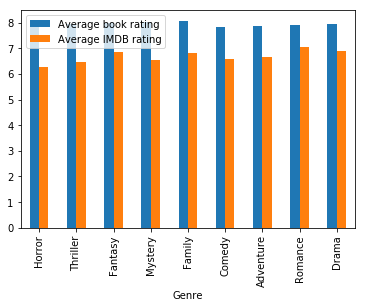

In [15]:
avg_rating_df.plot(kind='bar')
plt.show()
